# Petalo Performance

- Study PETALO performance

In [1]:
import Pkg

In [3]:
Pkg.add.(["HTTP", "Plots", "DataFrames", "HDF5","DrWatson", "StatsBase", "PhysicalConstants"]);

In [6]:
Pkg.add.(["LsqFit","GLM"])

2-element Vector{Nothing}:
 nothing
 nothing

In [7]:
Pkg.add("Distributions") 

In [1]:
using Distributions

In [2]:
using LsqFit
using GLM

In [3]:
using HTTP
using Plots
using DataFrames
using HDF5
using DrWatson
using Test
using PhysicalConstants
using PhysicalConstants.CODATA2018
using Unitful

In [4]:
using Glob
using CSV

In [5]:
using Statistics
using StatsBase
using Printf

In [6]:
using Logging

In [7]:
@quickactivate "JPetalo"

In [8]:
pwd()

"/Users/jj/JuliaProjects/JPetalo/notebooks"

In [9]:
datadir()

"/Users/jj/JuliaProjects/JPetalo/data"

In [10]:
srcdir()

"/Users/jj/JuliaProjects/JPetalo/src"

In [11]:
include(srcdir("JPetalo.jl"))

Main.JPetalo

In [12]:
import Unitful:
    nm, μm, mm, cm, m, km, inch, ft, mi,
    ac,
    mg, g, kg,
    Ra, °F, °C, K,
    rad, °,
    ns, μs, ms, ps, s, minute, hr, d, yr, Hz,
    eV,
    μJ, mJ, J,
	mW, μW, W,
    A, N, mol, mmol, V, L, mL, μL, M

In [13]:
function loglevel(log)
    if log == "Debug"
        logger = SimpleLogger(stdout, Logging.Debug)
    elseif log =="Info"
        logger = SimpleLogger(stdout, Logging.Info)
    else
        logger = SimpleLogger(stdout, Logging.Warn)
    end
    old_logger = global_logger(logger)
end

loglevel (generic function with 1 method)

# Characterization 

In [14]:
loglevel("Warn")

Base.CoreLogging.SimpleLogger(IJulia.IJuliaStdio{Base.PipeEndpoint}(IOContext(Base.PipeEndpoint(RawFD(46) open, 0 bytes waiting))), Info, Dict{Any, Int64}())

### Read Nema7 Phot DF

In [15]:
n7df = JPetalo.readdf("n7df-phot");  

In [19]:
nrow(n7df)

1030775

In [17]:
println(names(n7df))

["nsipm1", "nsipm2", "phistd1", "phistd2", "q1", "q2", "r1", "r1q", "r2", "r2q", "t1", "t2", "ta1", "ta2", "tr1", "tr2", "ux", "uy", "uz", "x1", "x2", "xb1", "xb2", "xr1", "xr2", "xs", "xt1", "xt2", "y1", "y2", "yb1", "yb2", "yr1", "yr2", "ys", "yt1", "yt2", "z1", "z2", "zb1", "zb2", "zr1", "zr2", "zs", "zstd1", "zstd2", "zt1", "zt2"]


## q1 vs q2

In [27]:
h1,p1 = JPetalo.hist2d(n7df.q1, n7df.q2, 150, "q1 (pes)","q2 (pes)", 100., 3500.,100., 3500.)
h2,p2       = JPetalo.hist1d(n7df.q1, "q1", 100, 100.0, 3500.);

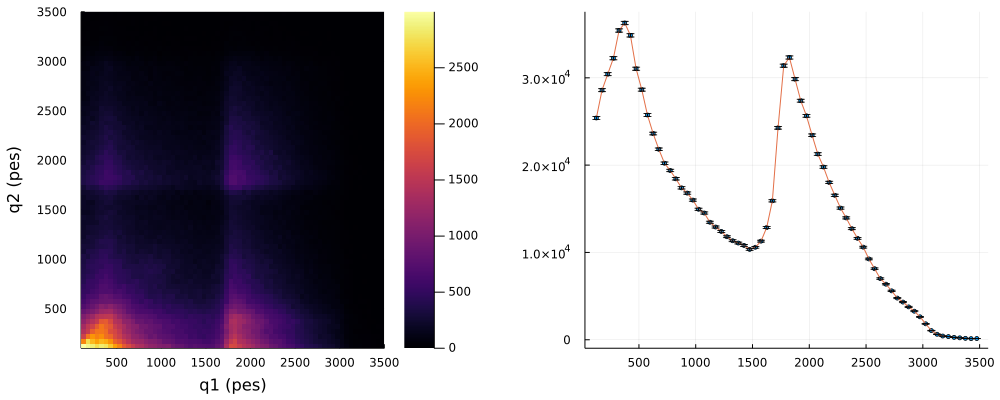

In [28]:
plot(p1, p2, layout= (1, 2), legend=false, fmt = :png, size = (1000, 400),
    left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)


## Cut in (q1,q2) in the inverval (1500, 3000)

In [25]:
n7dfq =JPetalo.selectinterval(n7df, "q1", "q2", 1500.0, 3000.0);

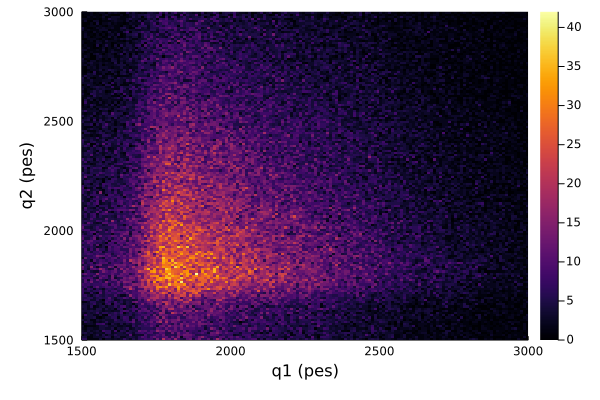

In [26]:
JPetalo.ploth2d(n7dfq, "q1","q2","q1 (pes)","q2 (pes)",100., 3500.,100., 3500.)

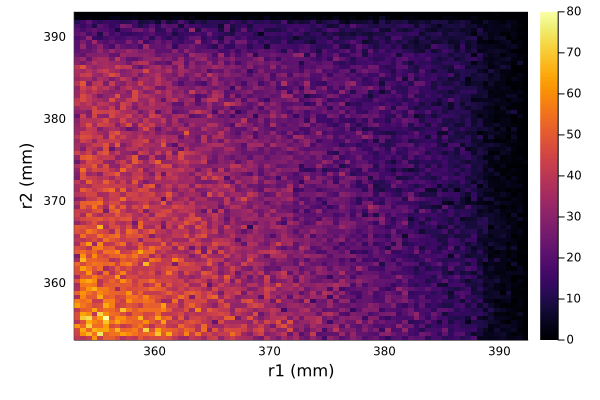

In [27]:
JPetalo.ploth2d(n7dfq, "r1","r2","r1 (mm)","r2 (mm)",350., 450.,350., 450.)

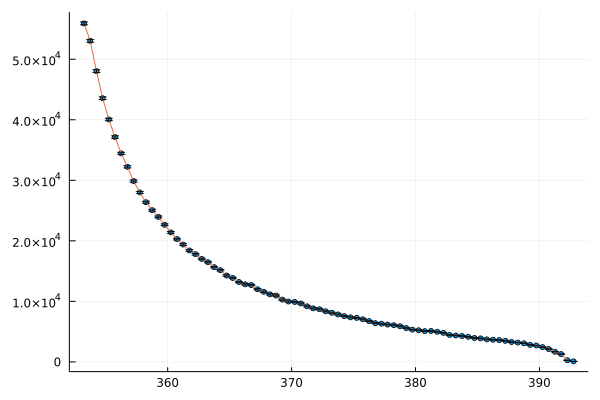

In [28]:
h,p       = JPetalo.hist1d(n7df.r1, "r1", 100, 350., 450.)
plot(p)

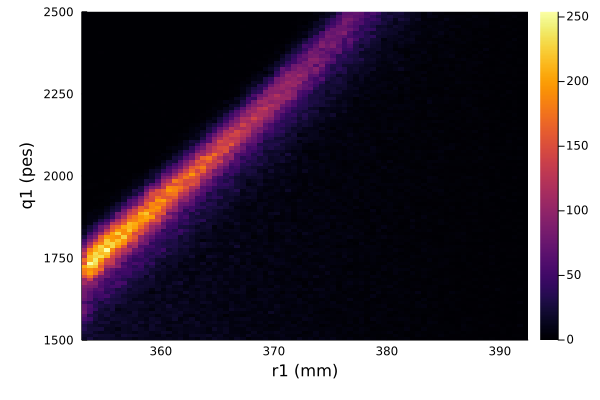

In [29]:
JPetalo.ploth2d(n7dfq, "r1","q1","r1 (mm)","q1 (pes)",350., 450.,1500.0, 2500.0)

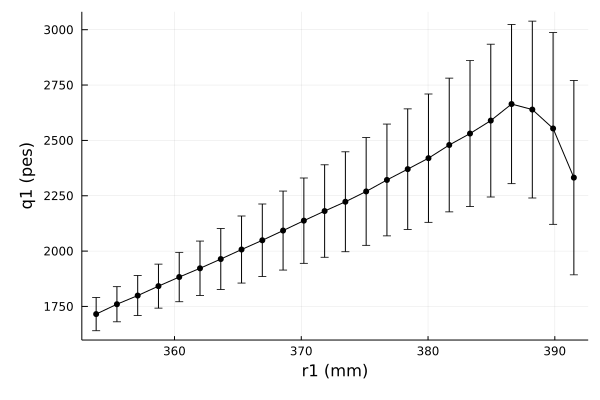

In [30]:
JPetalo.profile(n7dfq, "r1","q1","r1 (mm)","q1 (pes)")

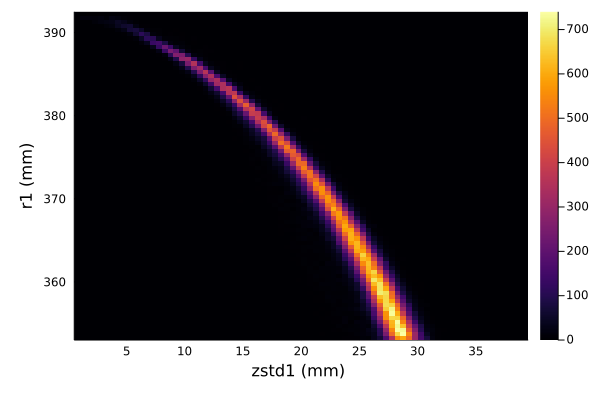

In [31]:
JPetalo.ploth2d(n7dfq, "zstd1","r1","zstd1 (mm) ","r1 (mm)",0.0, 40.0,350., 450.)

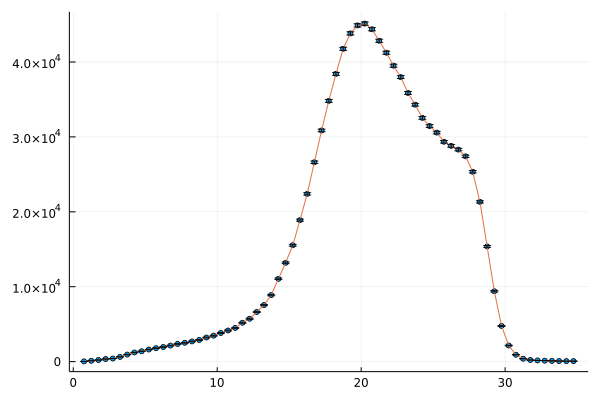

In [32]:
h,p       = JPetalo.hist1d(n7df.zstd1, "zstd1", 100, 0.,35.)
plot(p)

In [33]:
n7dfz =JPetalo.selectinterval(n7dfq, "zstd1", "zstd2", 3.0, 30.0);

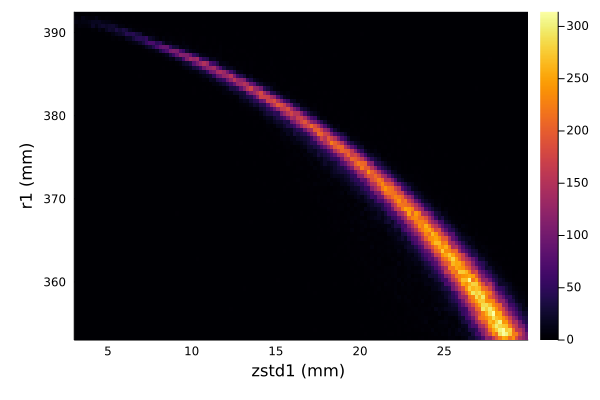

In [34]:
JPetalo.ploth2d(n7dfz, "zstd1","r1","zstd1 (mm) ","r1 (mm)",0.0, 40.0,350., 450.)

for n7dfz: fit parameters[392.26976278287475, -0.15084618431309726, -0.03975197488440605]


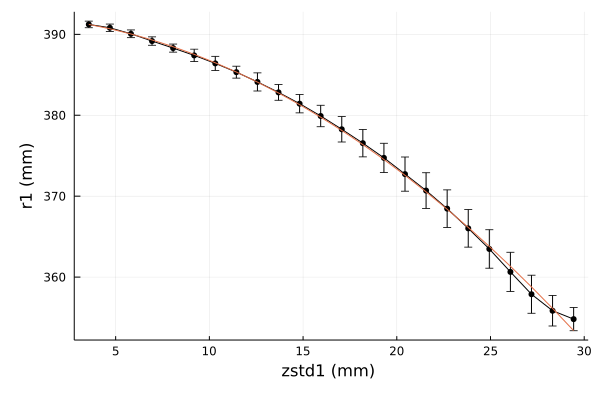

In [35]:
cz, fz, pz = JPetalo.fit_profile(n7dfz, "zstd1","r1","zstd1 (mm) ","r1 (mm)", "pol2")
println("for n7dfz: fit parameters", cz)
 
plot(pz,  layout= (1, 1), legend=false, fmt = :png,  
        left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)


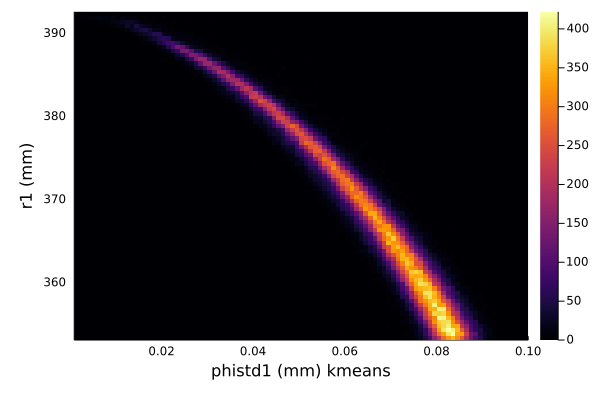

In [36]:
JPetalo.ploth2d(n7dfq, "phistd1","r1","phistd1 (mm) kmeans","r1 (mm)",0.0, 0.1, 350., 450.)

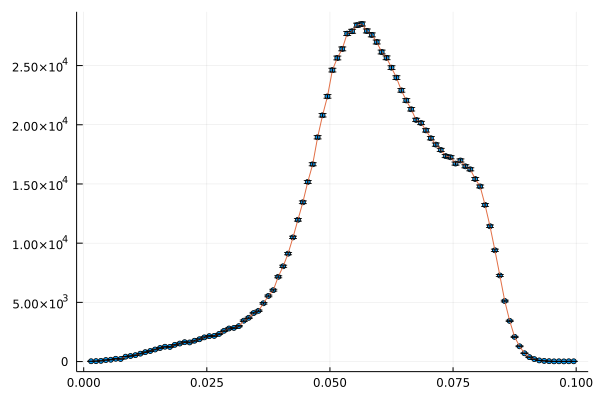

In [37]:
h,p       = JPetalo.hist1d(n7df.phistd1, "phistd1", 100, 0.,0.1)
plot(p)

In [38]:
n7dfp =JPetalo.selectinterval(n7dfz, "phistd1", "phistd2", 0.02, 0.085);

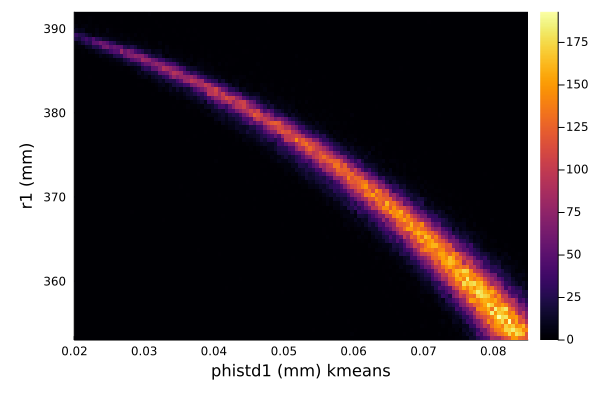

In [39]:
JPetalo.ploth2d(n7dfp, "phistd1","r1","phistd1 (mm) kmeans","r1 (mm)",0.0, 0.1, 350., 450.)

for n7dfp: fit parameters[392.3022445144583, -63.01317694127801, -4652.477855570365]


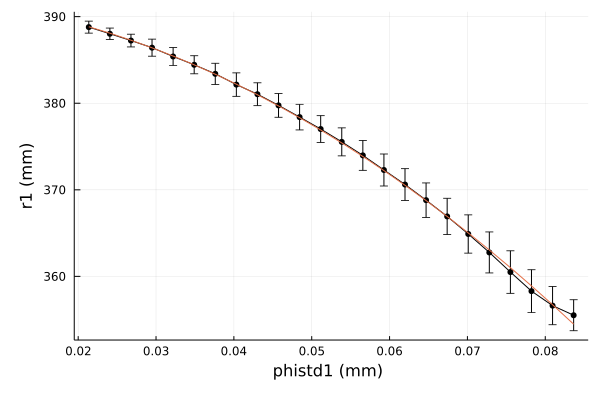

In [40]:
cp, fp, pp = JPetalo.fit_profile(n7dfp, "phistd1","r1","phistd1 (mm) ","r1 (mm)", "pol2")
println("for n7dfp: fit parameters", cp)
 
plot(pp,  layout= (1, 1), legend=false, fmt = :png,  
        left_margin=5Plots.mm, right_margin=1Plots.mm, bottom_margin=5Plots.mm)


### ZSTD resolution

In [41]:
r1z = fz.(n7dfp.zstd1);
r1p = fp.(n7dfp.phistd1);

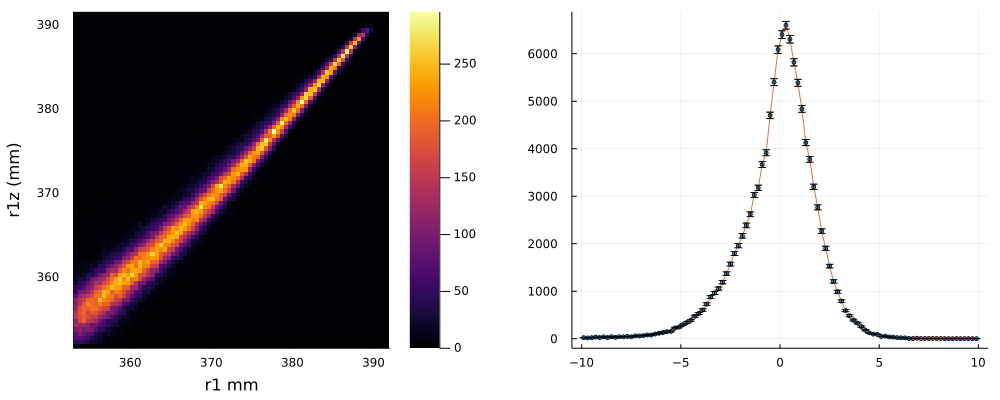

In [42]:
JPetalo.plotreso(n7dfp, r1z, "r1 mm", "r1z (mm)", -10., 10.)

sigma1 =   1.827 sigma2 =   0.668

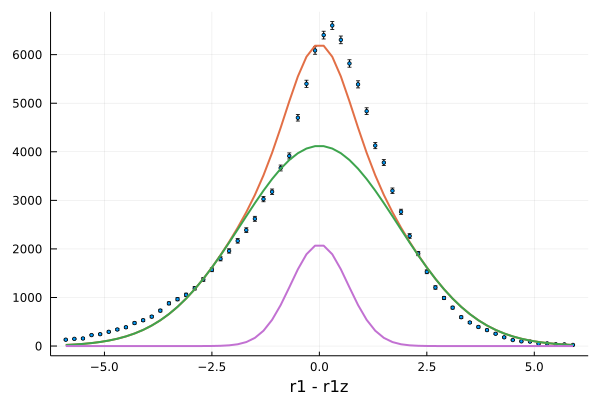

In [44]:
fg, p = JPetalo.fitg2(n7dfp.r1 - r1z, "r1 - r1z", -6., 6., -6.0, -2.5, -2.5, 2.5, -6.0, 6.0; bins=100)
@printf "sigma1 = %7.3f sigma2 = %7.3f" fg.sigma1 fg.sigma2
plot(p)

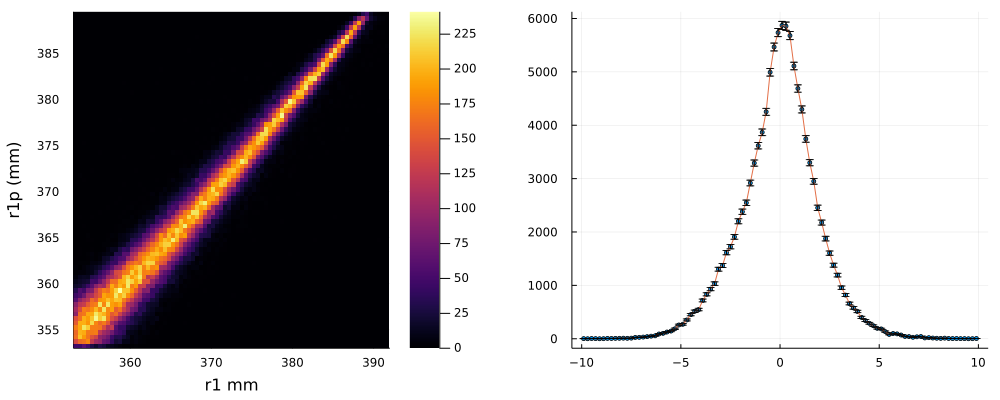

In [45]:
JPetalo.plotreso(n7dfp, r1p, "r1 mm", "r1p (mm)", -10., 10.)

sigma1 =   2.064 sigma2 =   0.777

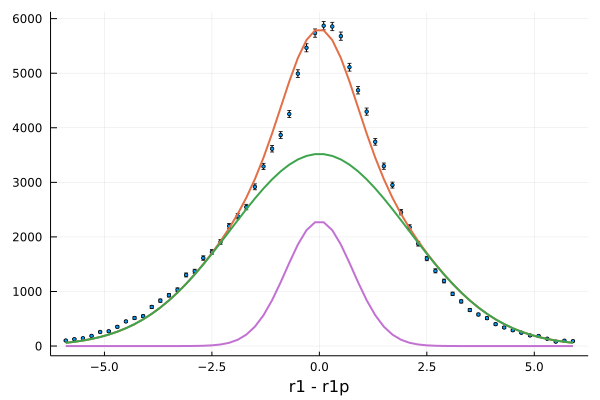

In [46]:
fg, p = JPetalo.fitg2(n7dfp.r1 - r1p, "r1 - r1p", -6., 6., -6.0, -2.5, -2.5, 2.5, -6.0, 6.0; bins=100)
@printf "sigma1 = %7.3f sigma2 = %7.3f" fg.sigma1 fg.sigma2
plot(p)

## Resolution in (x,y,z,r) intrinsic

In [47]:
limxy = 5.0;

In [48]:
hxtxr, pxtxr = JPetalo.hist1d(n7dfp.xt1 - n7dfp.x1, "xt - xr", 50,  -limxy, limxy);
plot(pxtxr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);

In [49]:
hytyr, pytyr = JPetalo.hist1d(n7dfp.yt1 - n7dfp.y1, "yt - yr", 50,  -limxy, limxy);
plot(pytyr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);

In [50]:
hztzr, pztzr = JPetalo.hist1d(n7dfp.zt1 - n7dfp.z1, "zt - zr", 50,  -limxy, limxy);
plot(pztzr,  layout = (1, 1), size = (500, 500), 
     legend=false, fmt = :png);

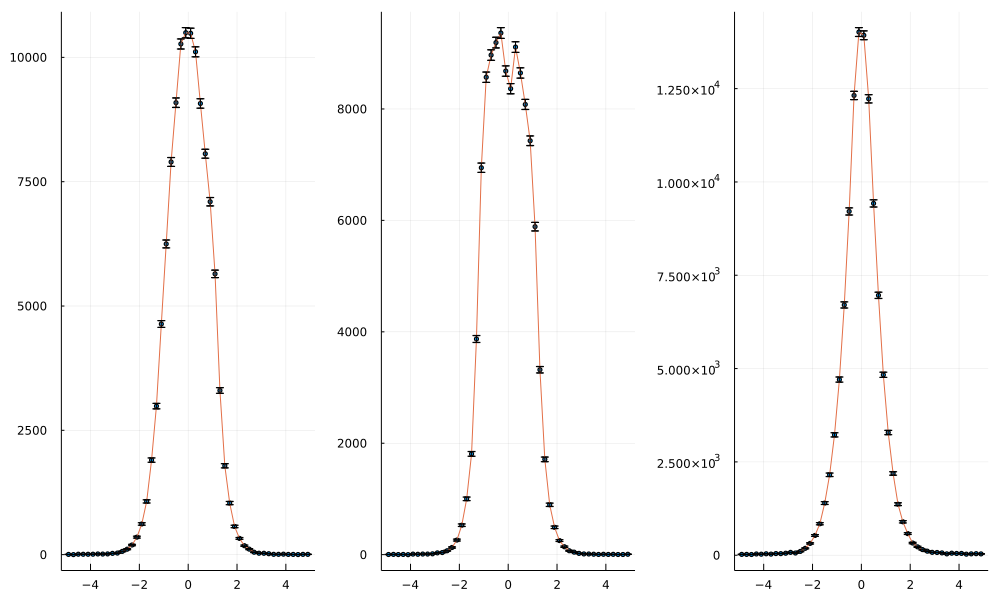

In [51]:
plot(pxtxr, pytyr,pztzr, layout = (1, 3), size = (1000, 600), 
     legend=false, fmt = :png)

sigma (1g) =   0.632 

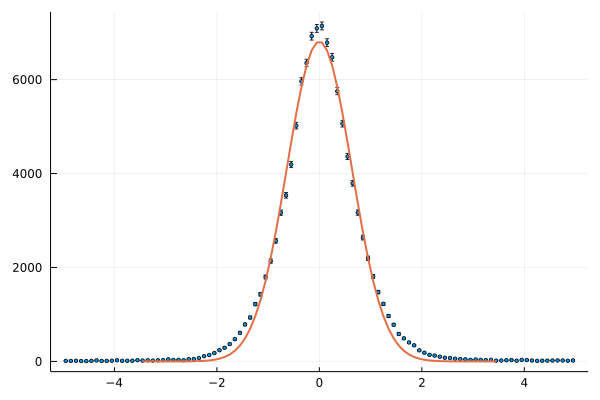

In [59]:
fg, p = JPetalo.fitg1(n7dfp.zt1 - n7dfp.z1, "dz", -5., 5., -3.5, 3.5, bins=100, bin1=50)
@printf "sigma (1g) = %7.3f " fg.sigma
plot(p)

## TOF

In [62]:
dfu = JPetalo.setunits(n7dfp);

In [63]:
dt12 = JPetalo.deltatime(dfu, JPetalo.dtfirst);

In [64]:
t12 = dt12./ps;

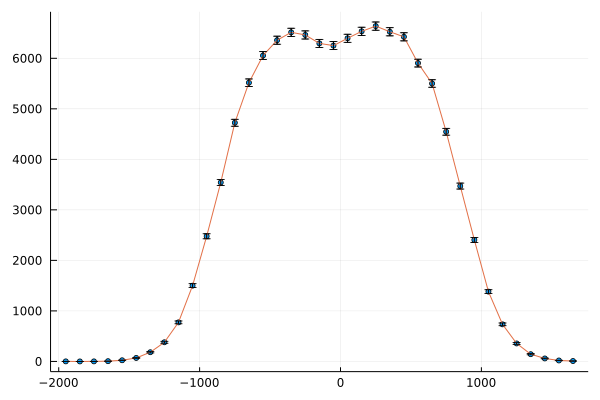

In [67]:
h,p       = JPetalo.hist1d(t12, "t12 ps", 50,  -2000., 2000.)
plot(p)

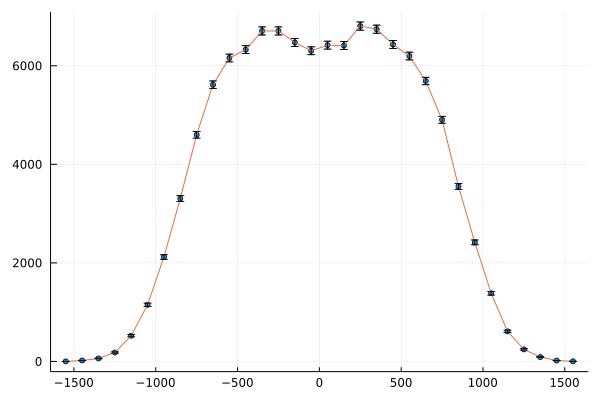

In [68]:
dtsr12 = JPetalo.ctsr(dfu, JPetalo.postrue)
tsr12 = dtsr12./ps
h,p       = JPetalo.hist1d(tsr12, "dtsr12 ps", 50,  -2000., 2000.)
plot(p)

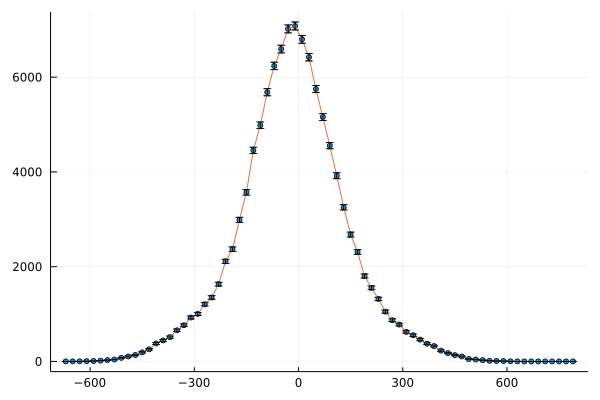

In [69]:
h,p       = JPetalo.hist1d(t12-tsr12, "t12 - tsr12", 100,  -1000., 1000.)
plot(p)

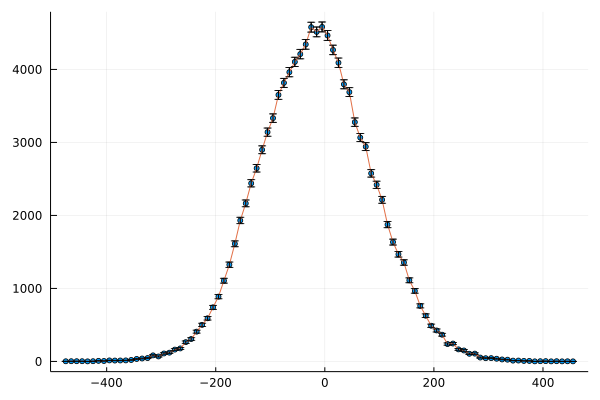

In [70]:
dtrb12 = JPetalo.cdoi(dfu, JPetalo.postrue);
trb12 = dtrb12 ./ps
h,p       = JPetalo.hist1d(trb12, "tbr12", 100,  -500., 500.)
plot(p)

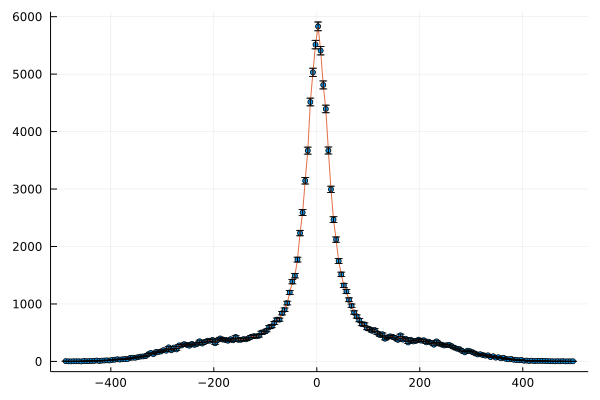

In [71]:
h,p       = JPetalo.hist1d(t12 - tsr12 - trb12  , "t12 - tsr12 - trb12", 200,  -500., 500.)
plot(p)

In [72]:
dt = t12 - tsr12 - trb12;

In [77]:
function plotg2fit(fg, label, lw=2)
    yg = fg.h.weights
    xg = JPetalo.centers(fg.h)
    psqc = scatter(xg,yg, yerr = sqrt.(yg), markersize=3, xlabel=label, legend=false)
    p = plot!(psqc,fg.xg, fg.yg, lw=lw)
    p = plot!(p,fg.xg, fg.gx1.(fg.xg), lw=lw)
    p = plot!(p,fg.xg, fg.gx2.(fg.xg), lw=lw)
end

plotg2fit (generic function with 2 methods)

sigma1 =  163.40  sigma2 =   22.94

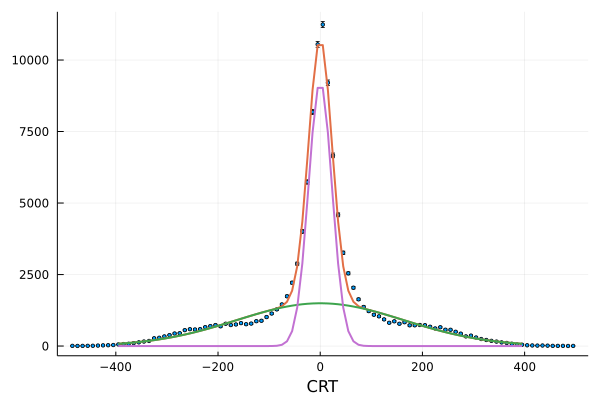

In [74]:
fg, p  = JPetalo.fitg2(t12 - tsr12 - trb12, "CRT", -500.0, 500.0, -400.0, -50.0, -50.0, 50.0, -400.0, 400.0, 
         bins=100, bins1=100, bins2=100)
@printf "sigma1 = %7.2f  sigma2 = %7.2f" fg.sigma1 fg.sigma2
plot(p)

In [75]:
@printf "FWHM: crt1 = %7.3f crt2 =  %7.3f" 2.3 * fg.sigma1 2.3*fg.sigma2

FWHM: crt1 = 375.831 crt2 =   52.758

In [76]:
t12, dt, fdt = JPetalo.crt(dfu, JPetalo.dtfirst,JPetalo.postrue,
                           -500.0, -50.0, 50,
                           -50., 50., 50,
                          -500.0, 500.0, 100);

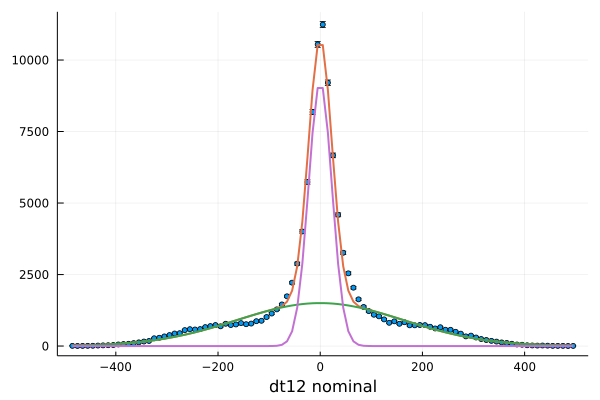

In [78]:
pdt12 = plotg2fit(fdt, "dt12 nominal")

In [79]:
 @printf "dt: FWHM1 = %7.2f ps FWHM2 = %7.2f ps " 2.3*fdt.sigma1 2.3*fdt.sigma2

dt: FWHM1 =  373.54 ps FWHM2 =   52.70 ps 

In [80]:
t12, dt, fdt = JPetalo.crt(dfu, JPetalo.dtminimum,JPetalo.postrue,
                           -500.0, -50.0, 50,
                           -50., 50., 50,
                          -500.0, 500.0, 100);

In [81]:
@printf "dt: FWHM1 = %7.2f ps FWHM2 = %7.2f ps " 2.3*fdt.sigma1 2.3*fdt.sigma2

dt: FWHM1 =  404.60 ps FWHM2 =  207.99 ps 

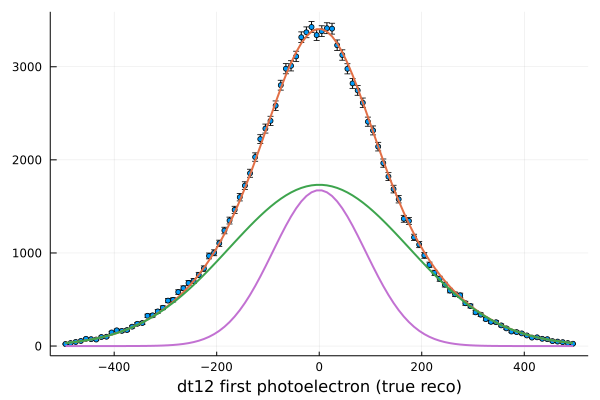

In [82]:
pdt12 = plotg2fit(fdt, "dt12 first photoelectron (true reco)")

In [83]:
t12, dt, fdt = JPetalo.crt(dfu, JPetalo.dtminimum,JPetalo.posreco,
                           -500.0, -50.0, 50,
                           -50., 50., 50,
                          -500.0, 500.0, 100);
@printf "dt: FWHM1 = %7.2f ps FWHM2 = %7.2f ps " 2.3*fdt.sigma1 2.3*fdt.sigma2

dt: FWHM1 =  402.15 ps FWHM2 =  206.93 ps 

In [84]:
t12, dt, fdt = JPetalo.crt(dfu, JPetalo.dtaverage,JPetalo.posreco,
                           -500.0, -50.0, 50,
                           -50., 50., 50,
                          -500.0, 500.0, 100);
@printf "dt: FWHM1 = %7.2f ps FWHM2 = %7.2f ps " 2.3*fdt.sigma1 2.3*fdt.sigma2

dt: FWHM1 =  345.73 ps FWHM2 =  177.70 ps 

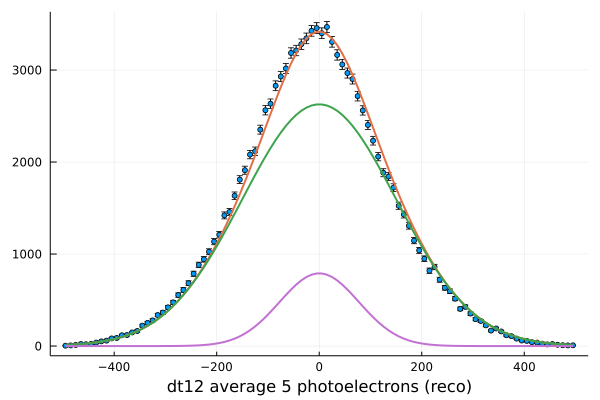

In [85]:
plotg2fit(fdt, "dt12 average 5 photoelectrons (reco)")

sigma (1g) = 135.568 

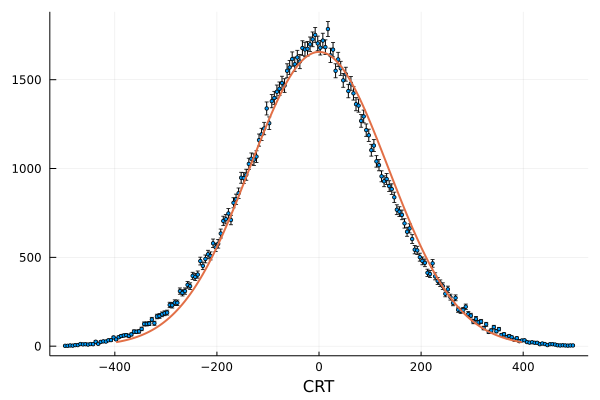

In [86]:
fg, p = JPetalo.fitg1(dt, "CRT", -500., 500., -400.0, 400.0, bins=200, bin1=50)
@printf "sigma (1g) = %7.3f " fg.sigma
plot(p)